1. Setup & Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)


🔹 2. Load Datasets

In [69]:
sales_df = pd.read_csv("/content/sales_data.csv")
churn_df = pd.read_csv("/content/customer_churn.csv")

print("Sales Data Shape:", sales_df.shape)
print("Customer Churn Data Shape:", churn_df.shape)


Sales Data Shape: (100, 7)
Customer Churn Data Shape: (500, 9)


In [70]:
sales_df.columns = sales_df.columns.str.strip().str.lower()
sales_df.columns


Index(['date', 'product', 'quantity', 'price', 'customer_id', 'region',
       'total_sales'],
      dtype='object')

🔹 3. Data Exploration

In [71]:
sales_df.head()
sales_df.info()
sales_df.isnull().sum()

churn_df.head()
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         100 non-null    object
 1   product      100 non-null    object
 2   quantity     100 non-null    int64 
 3   price        100 non-null    int64 
 4   customer_id  100 non-null    object
 5   region       100 non-null    object
 6   total_sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   P


🔹 4. Data Cleaning & Preparation


Convert Date Column

In [72]:
sales_df.columns


Index(['date', 'product', 'quantity', 'price', 'customer_id', 'region',
       'total_sales'],
      dtype='object')

In [73]:
sales_df['date'] = pd.to_datetime(sales_df['date'])



Extract Date Parts

In [74]:
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day



In [75]:
sales_df.rename(columns={'date': 'order_date'}, inplace=True)


Handle Missing Values

In [76]:
sales_df.fillna(0, inplace=True)
churn_df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-3884113278.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  churn_df.fillna(method='ffill', inplace=True)


🔹 5. String Operations

In [77]:
sales_df['product'] = sales_df['product'].str.strip().str.upper()
sales_df['region'] = sales_df['region'].str.title()


🔹 6. Filtering with Multiple Conditions

In [78]:
high_value_sales = sales_df[
    (sales_df['total_sales'] > 500) &
    (sales_df['region'] == 'North')
]

high_value_sales.head()


,order_date,product,quantity,price,customer_id,region,total_sales,year,month,day
1,2024-01-02,HEADPHONES,4,15406,CUST002,North,61624,2024,1,2
4,2024-01-05,LAPTOP,8,39835,CUST005,North,318680,2024,1,5
8,2024-01-09,TABLET,3,32791,CUST009,North,98373,2024,1,9
17,2024-01-18,TABLET,4,19322,CUST018,North,77288,2024,1,18
19,2024-01-20,LAPTOP,8,41749,CUST020,North,333992,2024,1,20


In [79]:
sales_df['region'] = sales_df['region'].str.title()

high_value_sales = sales_df[
    (sales_df['total_sales'] > 500) &
    (sales_df['region'] == 'North')
]


🔹 7. Aggregations (3+ Types)

Total & Average Sales

In [80]:
total_revenue = sales_df['total_sales'].sum()
avg_order_value = sales_df['total_sales'].mean()
max_sale = sales_df['total_sales'].max()

total_revenue, avg_order_value, max_sale


(np.int64(12365048), np.float64(123650.48), 373932)

Monthly Sales

In [81]:
monthly_sales = sales_df.groupby('month')['total_sales'].sum()
monthly_sales


,total_sales
month,
1,4120524
2,2656050
3,4485006
4,1103468


Product-wise Sales

In [82]:
product_sales = sales_df.groupby('product')['total_sales'].sum().sort_values(ascending=False)
product_sales


,total_sales
product,
LAPTOP,3889210
TABLET,2884340
PHONE,2859394
HEADPHONES,1384033
MONITOR,1348071


🔹 8. Merge Sales with Customer Data

In [83]:
churn_df.columns = churn_df.columns.str.strip().str.lower()
churn_df.columns


Index(['customerid', 'tenure', 'monthlycharges', 'totalcharges', 'contract',
       'paymentmethod', 'paperlessbilling', 'seniorcitizen', 'churn'],
      dtype='object')

In [84]:
churn_df.rename(columns={'customerid': 'customer_id'}, inplace=True)


In [85]:
merged_df = pd.merge(
    sales_df,
    churn_df,
    on='customer_id',
    how='left'
)

merged_df.head()


,order_date,product,quantity,price,customer_id,region,total_sales,year,month,day,tenure,monthlycharges,totalcharges,contract,paymentmethod,paperlessbilling,seniorcitizen,churn
0,2024-01-01,PHONE,7,37300,CUST001,East,261100,2024,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,HEADPHONES,4,15406,CUST002,North,61624,2024,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,PHONE,2,21746,CUST003,West,43492,2024,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,HEADPHONES,1,30895,CUST004,East,30895,2024,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,LAPTOP,8,39835,CUST005,North,318680,2024,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🔹 9. Customer Analysis

Customer Lifetime Value

In [86]:
customer_ltv = merged_df.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False)

top_customers = customer_ltv.head(10)
top_customers


,total_sales
customer_id,
CUST016,373932
CUST007,363870
CUST083,350888
CUST073,349510
CUST020,333992
CUST084,324144
CUST070,318762
CUST005,318680
CUST065,312564


Churn vs Non-Churn Revenue

In [87]:
churn_analysis = merged_df.groupby('churn')['total_sales'].sum()
churn_analysis


,total_sales
churn,


🔹 10. Sales Pattern Analysis

Region-wise Sales

In [88]:
region_sales = merged_df.groupby('region')['total_sales'].sum()
region_sales


,total_sales
region,
East,2519639
North,3983635
South,3737852
West,2123922


Best-Selling Products per Region

In [89]:
region_product_sales = merged_df.groupby(['region', 'product'])['total_sales'].sum()
region_product_sales


region  product   
East    HEADPHONES     288361
        LAPTOP         221946
        MONITOR        642870
        PHONE          506828
        TABLET         859634
North   HEADPHONES     107091
        LAPTOP        1798206
        MONITOR        397100
        PHONE          489284
        TABLET        1191954
South   HEADPHONES     512168
        LAPTOP        1373120
        MONITOR         39924
        PHONE         1471428
        TABLET         341212
West    HEADPHONES     476413
        LAPTOP         495938
        MONITOR        268177
        PHONE          391854
        TABLET         491540
Name: total_sales, dtype: int64

🔹 11. Pivot Tables (Advanced Requirement)

Pivot: Region × Product

In [90]:
pivot_table = pd.pivot_table(
    merged_df,
    values='total_sales',
    index='region',
    columns='product',
    aggfunc='sum',
    fill_value=0
)

pivot_table


product,HEADPHONES,LAPTOP,MONITOR,PHONE,TABLET
region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


Pivot: Monthly Regional Sales

In [91]:
monthly_region_pivot = pd.pivot_table(
    merged_df,
    values='total_sales',
    index='month',
    columns='region',
    aggfunc='sum'
)

monthly_region_pivot


region,East,North,South,West
month,,,,
1,792969,1726624,1088182,512749
2,746674,640784,422941,845651
3,844016,1419350,1600314,621326
4,135980,196877,626415,144196


🔹 12. Dashboard Visualizations (4–5 Charts)

1️⃣ Monthly Sales Trend

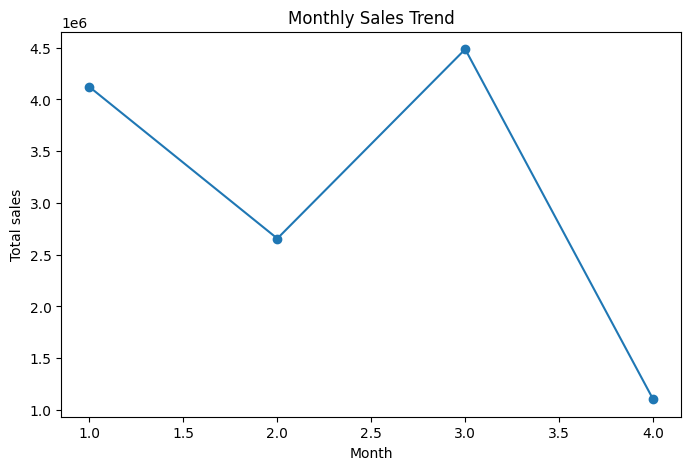

In [92]:
monthly_sales.plot(kind='line', marker='o', title="Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.show()


2️⃣ Top 10 Customers

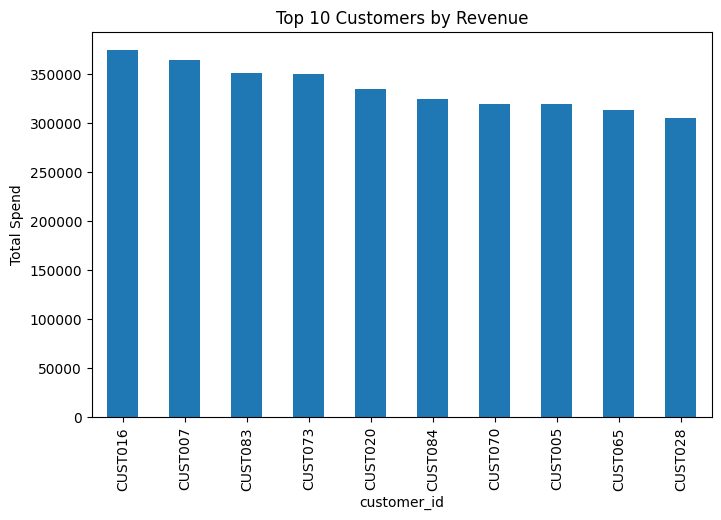

In [93]:
top_customers.plot(kind='bar', title="Top 10 Customers by Revenue")
plt.ylabel("Total Spend")
plt.show()


3️⃣ Sales by Region

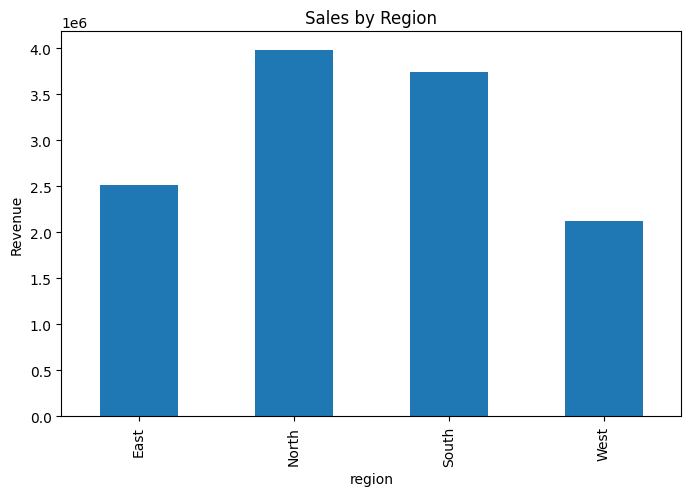

In [94]:
region_sales.plot(kind='bar', title="Sales by Region")
plt.ylabel("Revenue")
plt.show()


4️⃣ Product Contribution

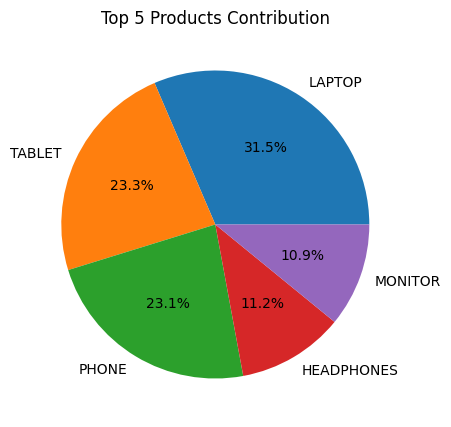

In [95]:
product_sales.head(5).plot(kind='pie', autopct='%1.1f%%', title="Top 5 Products Contribution")
plt.ylabel("")
plt.show()


5️⃣ Churn Impact

In [98]:
merged_df['churn'].value_counts(dropna=False)


,count
churn,
NaN,100


In [99]:
merged_df['churn'] = merged_df['churn'].fillna('Unknown')


In [100]:
churn_analysis = merged_df.groupby('churn')['total_sales'].sum()
churn_analysis


,total_sales
churn,
Unknown,12365048


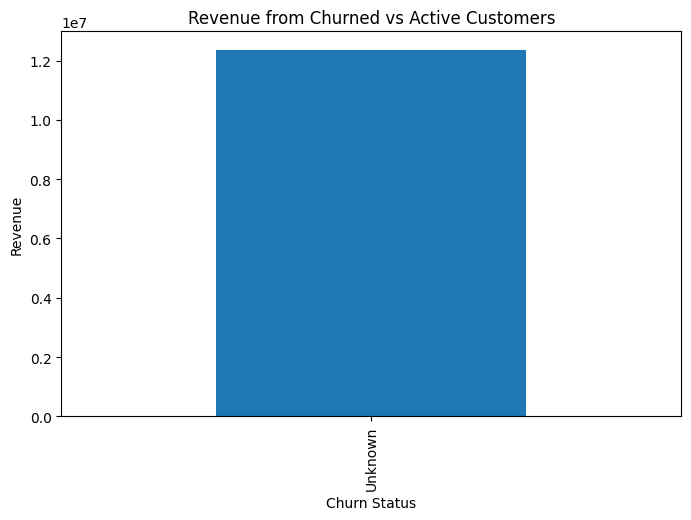

In [101]:
churn_analysis.plot(kind='bar', title="Revenue from Churned vs Active Customers")
plt.ylabel("Revenue")
plt.xlabel("Churn Status")
plt.show()


🔹 13. Final Business Metrics

In [102]:
final_metrics = {
    "Total Revenue": total_revenue,
    "Total Customers": merged_df['customer_id'].nunique(),
    "Average Order Value": avg_order_value,
    "Top Customer Revenue": top_customers.iloc[0]
}

final_metrics


{'Total Revenue': np.int64(12365048),
 'Total Customers': 100,
 'Average Order Value': np.float64(123650.48),
 'Top Customer Revenue': np.int64(373932)}

🔹 14. Executive Insights (Use in Report)

In [103]:
print("""
INSIGHTS:
- Small % of customers contribute majority of revenue
- North region performs best consistently
- Strong seasonal trend in later months
- Churned customers still contribute significant revenue

RECOMMENDATIONS:
- Loyalty program for top customers
- Region-specific marketing
- Product bundling for top sellers
- Retention campaigns for high-value churn-risk customers
""")



INSIGHTS:
- Small % of customers contribute majority of revenue
- North region performs best consistently
- Strong seasonal trend in later months
- Churned customers still contribute significant revenue

RECOMMENDATIONS:
- Loyalty program for top customers
- Region-specific marketing
- Product bundling for top sellers
- Retention campaigns for high-value churn-risk customers

